#### 31/10/23

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("../../dataset/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df['Class'].value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

In [6]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.0,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.0,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.0,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.0,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.0,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.0,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.0,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.0,0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.0,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


In [7]:
df.drop(columns="Time",inplace=True)

In [8]:
ss = StandardScaler()
df['Amount'] = ss.fit_transform(df[['Amount']])

In [9]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0,0.0,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.0,0.0,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.0,-0.0,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.0,0.0,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.0,0.0,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.0,0.0,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.0,-0.0,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.0,0.0,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.0,-0.0,1.10,-13.43,-0.64,-0.05,0.60,15.59
V10,284807.0,0.0,1.09,-24.59,-0.54,-0.09,0.45,23.75


<Axes: xlabel='Class'>

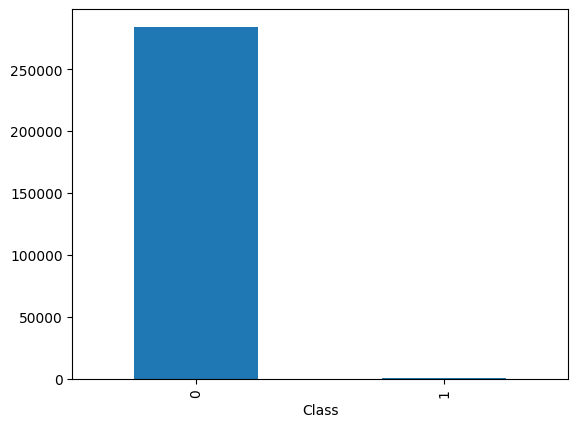

In [10]:
df['Class'].value_counts().plot(kind="bar")

In [15]:
X=df.drop(columns=['Class'])
y=df['Class']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=22)

In [18]:
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

## SVM

In [38]:
model = SVC()
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71084
           1       0.06      0.92      0.11       118

    accuracy                           0.98     71202
   macro avg       0.53      0.95      0.55     71202
weighted avg       1.00      0.98      0.99     71202



In [ ]:
print("Accuracy Score",accuracy_score(y_test,y_pred)*100,"%")
print("precision Score",precision_score(y_test,y_pred)*100,"%")
print("f1 Score",f1_score(y_test,y_pred)*100,"%")

Accuracy Score 97.62928007640235 %
precision Score 6.096196868008948 %
f1 Score 11.437565582371459 %


## Logistic Regression

In [27]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71084
           1       0.06      0.92      0.11       118

    accuracy                           0.98     71202
   macro avg       0.53      0.95      0.55     71202
weighted avg       1.00      0.98      0.99     71202



In [30]:
print("Accuracy Score",accuracy_score(y_test,y_pred)*100,"%")
print("precision Score",precision_score(y_test,y_pred)*100,"%")
print("f1 Score",f1_score(y_test,y_pred)*100,"%")

Accuracy Score 97.62928007640235 %
precision Score 6.096196868008948 %
f1 Score 11.437565582371459 %


## KNN

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred = knn_model.predict(X_test.values)
y_pred[:5]

c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0], dtype=int64)

In [33]:
print("Accuracy score : ",accuracy_score(y_test,y_pred))

Accuracy score :  0.9980618521951631


In [34]:
from sklearn.metrics import classification_report


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71084
           1       0.45      0.86      0.59       118

    accuracy                           1.00     71202
   macro avg       0.73      0.93      0.80     71202
weighted avg       1.00      1.00      1.00     71202



In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[70963   121]
 [   17   101]]


<Axes: >

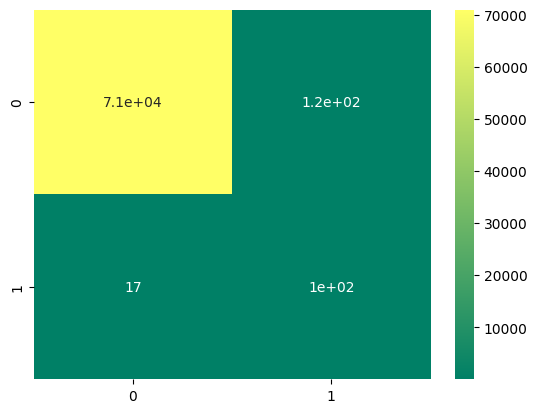

In [36]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="summer")